In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import shap
import joblib

plt.style.use("seaborn-v0_8-muted")

In [67]:
data_path = Path("../data/processed/cleaned_gravity_speed_data.csv")
model_path = Path("../models/rf_model.joblib")

df = pd.read_csv(data_path)
model = joblib.load(model_path)

print(f"✅ Data shape: {df.shape}")

✅ Data shape: (1000, 9)


In [68]:
X = df.drop(columns=["time_difference_s"])
y = df["time_difference_s"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "../models/rf_model.joblib")

['../models/rf_model.joblib']

In [70]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📊 RMSE of Random Forest: {rmse:.4f}")

📊 RMSE of Random Forest: 0.0004


C:\Users\admin\AppData\Local\Temp\ipykernel_13752\3895421469.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x="importance_mean", y="feature", palette="Blues_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_13752\3895421469.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


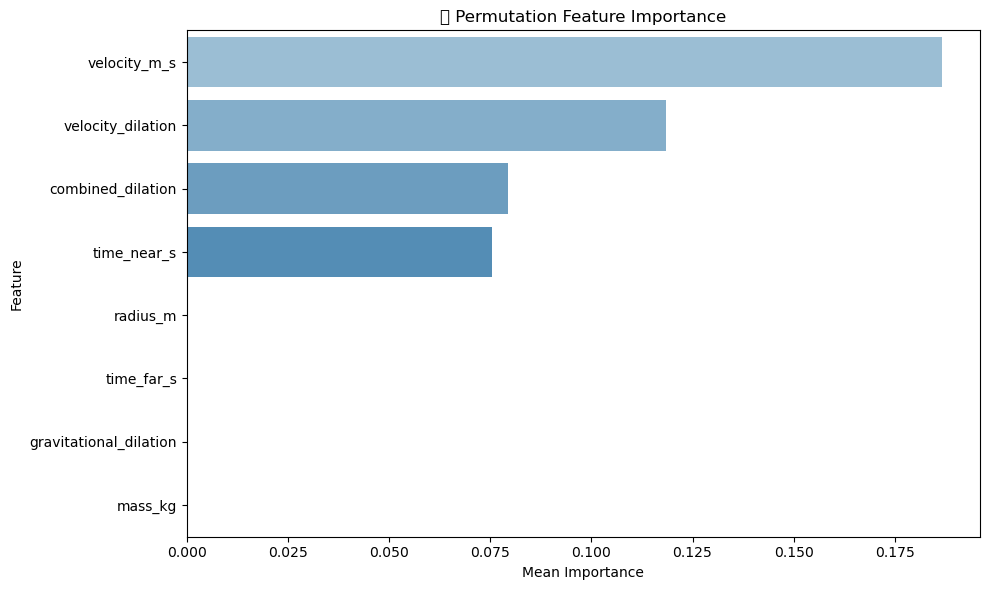

In [ ]:
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances_df = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": perm_result.importances_mean,
    "importance_std": perm_result.importances_std
}).sort_values(by="importance_mean", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances_df,
    x="importance_mean",
    y="feature",
    color="steelblue"  # or use hue='feature' and legend=False for varied color
)
plt.title("Permutation Feature Importance")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


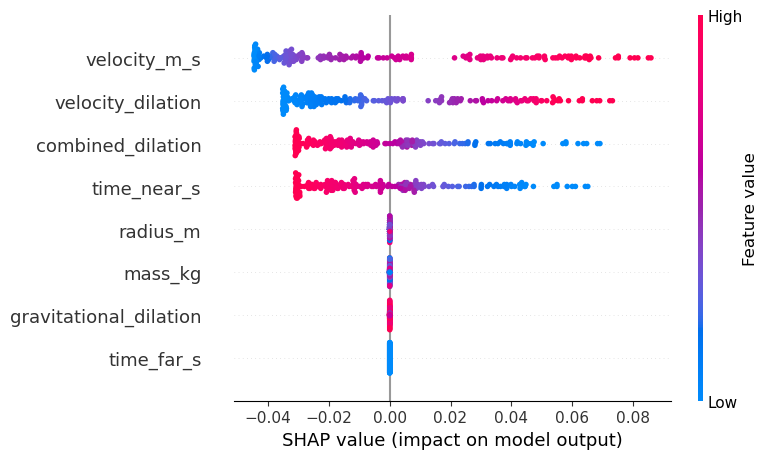

In [72]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [73]:
shap.initjs()
shap.plots.force(shap_values[0])

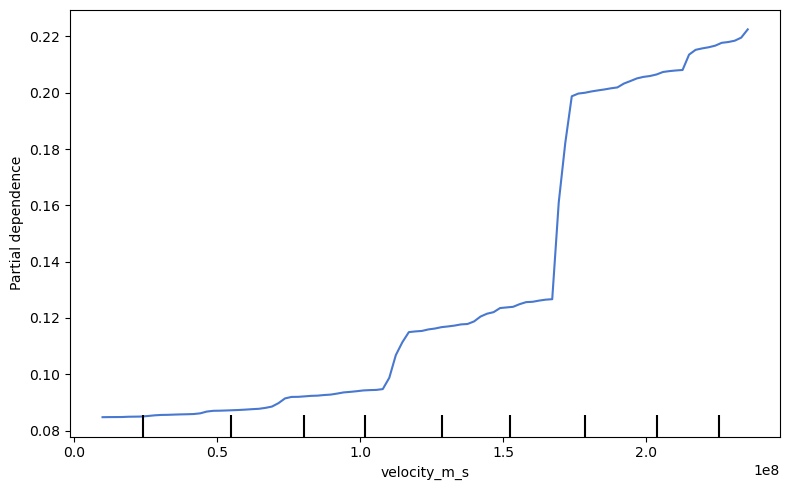

In [74]:
top_feature = importances_df["feature"].iloc[0]

fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X, [top_feature], ax=ax)
plt.tight_layout()
plt.show()